### This notebook contains a Classification model using TensorFlow to predict Audiobook customer conversion
*  **Data source**: Audiobooks_data.csv (Available in github repo) <br>
*  **Data preprocessing**: Balancing dataset using SMOTETomek,Scaling inputs,Splitting into training,validattion & test, Saving into .npz format <br>
*  **Model building**: Loading the three .npz files, Training the model using Neural network <br>
*  **Model Evaluation**: Evaluating the trained model 

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [20]:
raw_data = pd.read_csv('E:\\Udemy\\Data science\\Python\\Deep Learning\\Classification\\Business case\\Audiobooks_data.csv')
raw_data.head()

,ID,Book length(mins)_overall,Book length(mins)_avg,Price_overall,Price_avg,Review,Review ?/10,Completion,Listened(mins),Support request,Last visited after Purchase date,Targets
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [21]:
raw_data['Targets'].unique()

array([0, 1], dtype=int64)

In [29]:
class1 = len([i for i in raw_data['Targets'] if i ==1])
class0 = len([i for i in raw_data['Targets'] if i ==0])
print('No of class1 :{} & No of class0 :{}'.format(class1,class0))

No of class1 :2237 & No of class0 :11847


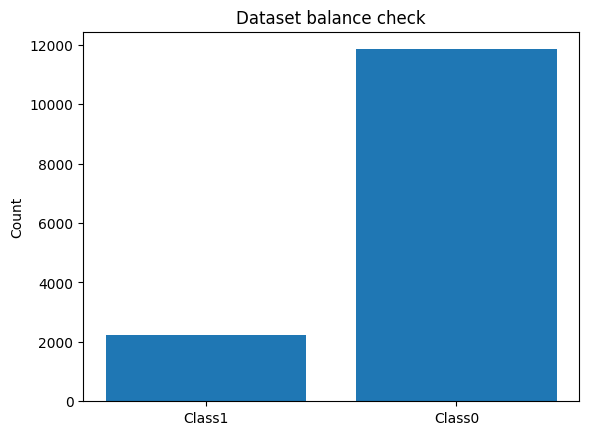

In [23]:
import matplotlib.pyplot as plt
plt.bar(['Class1','Class0'], [class1,class0])
plt.ylabel('Count')
plt.title('Dataset balance check')
plt.show()

In [24]:
#Split the dataset into features and targets
data = raw_data.copy()
features = data.iloc[:,:-1]
targets = data.iloc[:,-1]
print(features.shape,targets.shape)

(14084, 11) (14084,)


#### Balancing the dataset

In [28]:
#Using SMOTETomek for balancing
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
features_bal , targets_bal = smt.fit_resample(features,targets)
print(features_bal.shape,targets_bal.shape)

(21948, 11) (21948,)


In [31]:
class1 = len([i for i in targets_bal if i==1])
class0 = len([i for i in targets_bal if i==0])
print('No of class1 :{} & No of class0 :{}'.format(class1,class0))

No of class1 :10974 & No of class0 :10974


#### Scaling the Inputs

In [32]:
scaler = StandardScaler()
scaler = scaler.fit(features_bal)
scaled_input = scaler.transform(features_bal)

#### Splitting dataset into training, validation and test

In [33]:
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(scaled_input, targets_bal, test_size=0.1, random_state=42)
validation_size = int(0.1 * input_train.shape[0])
validation_input =  input_train[input_train.shape[0]-validation_size:]
validation_output = output_train[output_train.shape[0]-validation_size:]
#Confirming balance of each dataset
print(np.sum(output_train)/output_train.shape[0])
print(np.sum(output_test)/output_test.shape[0])
print(np.sum(validation_output)/validation_output.shape[0])

0.5017465701412444
0.48428246013667425
0.5043037974683544


#### Saving the three datasets in .npz format

In [34]:
np.savez('Training_audiobook.npz', features= input_train, targets= output_train)
np.savez('Validation_audiobook.npz', features= input_test, targets= output_test)
np.savez('Test_audiobook.npz', features= validation_input, targets= validation_output)

#### Loading .npz datasets

In [35]:
temp = np.load('Training_audiobook.npz')
#print(temp['targets'][0])
train_inputs, train_outputs = temp['features'].astype(float), temp['targets'].astype(int)
#print(train_outputs[0])
temp = np.load('Validation_audiobook.npz')
val_inputs, val_outputs = temp['features'].astype(float), temp['targets'].astype(int)
temp = np.load('Test_audiobook.npz')
test_inputs, test_outputs = temp['features'].astype(float), temp['targets'].astype(int)

#### Classification model using TensorFlow

In [36]:
import tensorflow as tf

In [37]:


output_size = 2
hidden_width = 50

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_width, activation='relu'),
                            tf.keras.layers.Dense(hidden_width, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
max_epochs = 100
early_stop = tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(train_inputs,
          train_outputs,
          batch_size = batch_size,
          epochs = max_epochs,
          callbacks = [early_stop],
          validation_data = (val_inputs,val_outputs),
          verbose=2
          )

Epoch 1/100
198/198 - 5s - loss: 0.4227 - accuracy: 0.7956 - val_loss: 0.3522 - val_accuracy: 0.8392 - 5s/epoch - 25ms/step
Epoch 2/100
198/198 - 1s - loss: 0.3202 - accuracy: 0.8528 - val_loss: 0.3256 - val_accuracy: 0.8501 - 563ms/epoch - 3ms/step
Epoch 3/100
198/198 - 1s - loss: 0.2999 - accuracy: 0.8619 - val_loss: 0.3103 - val_accuracy: 0.8519 - 567ms/epoch - 3ms/step
Epoch 4/100
198/198 - 1s - loss: 0.2897 - accuracy: 0.8663 - val_loss: 0.3075 - val_accuracy: 0.8524 - 547ms/epoch - 3ms/step
Epoch 5/100
198/198 - 1s - loss: 0.2816 - accuracy: 0.8737 - val_loss: 0.2978 - val_accuracy: 0.8569 - 548ms/epoch - 3ms/step
Epoch 6/100
198/198 - 1s - loss: 0.2775 - accuracy: 0.8734 - val_loss: 0.2908 - val_accuracy: 0.8633 - 547ms/epoch - 3ms/step
Epoch 7/100
198/198 - 1s - loss: 0.2727 - accuracy: 0.8773 - val_loss: 0.2956 - val_accuracy: 0.8606 - 605ms/epoch - 3ms/step
Epoch 8/100
198/198 - 1s - loss: 0.2689 - accuracy: 0.8780 - val_loss: 0.2935 - val_accuracy: 0.8615 - 544ms/epoch - 3ms

#### Evaluating the model

In [38]:
test_loss, test_accuracy = model.evaluate(test_inputs,test_outputs)
print('Test Loss: {:.2f} Test Accuracy: {:.2f}%'.format(test_loss, test_accuracy*100))

62/62 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.8805
Test Loss: 0.27 Test Accuracy: 88.05%
